In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as  plt
from datetime import timedelta

In [4]:
#read parquet files

df = pd.read_parquet("/home/user/Desktop/wheres-my-taxi/wheres-my-taxi/2019_data/yellow_tripdata_2019-01.parquet")

In [5]:
df

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge,airport_fee
0,1,2019-01-01 00:46:40,2019-01-01 00:53:20,1.0,1.50,1.0,N,151,239,1,7.00,0.50,0.5,1.65,0.00,0.3,9.95,NaN,NaN
1,1,2019-01-01 00:59:47,2019-01-01 01:18:59,1.0,2.60,1.0,N,239,246,1,14.00,0.50,0.5,1.00,0.00,0.3,16.30,NaN,NaN
2,2,2018-12-21 13:48:30,2018-12-21 13:52:40,3.0,0.00,1.0,N,236,236,1,4.50,0.50,0.5,0.00,0.00,0.3,5.80,NaN,NaN
3,2,2018-11-28 15:52:25,2018-11-28 15:55:45,5.0,0.00,1.0,N,193,193,2,3.50,0.50,0.5,0.00,0.00,0.3,7.55,NaN,NaN
4,2,2018-11-28 15:56:57,2018-11-28 15:58:33,5.0,0.00,2.0,N,193,193,2,52.00,0.00,0.5,0.00,0.00,0.3,55.55,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7696612,2,2019-01-31 23:37:20,2019-02-01 00:10:43,NaN,10.24,NaN,None,142,95,0,0.00,2.75,0.0,0.00,5.76,0.3,0.00,NaN,NaN
7696613,2,2019-01-31 23:28:00,2019-01-31 23:50:50,NaN,12.43,NaN,None,48,213,0,48.80,5.50,0.0,0.00,0.00,0.3,54.60,NaN,NaN
7696614,2,2019-01-31 23:11:00,2019-01-31 23:46:00,NaN,9.14,NaN,None,159,246,0,51.05,2.75,0.5,0.00,0.00,0.3,54.60,NaN,NaN
7696615,2,2019-01-31 23:03:00,2019-01-31 23:14:00,NaN,0.00,NaN,None,265,265,0,0.00,0.00,0.5,9.82,0.00,0.3,0.00,NaN,NaN


Data Preprocessing

In [5]:
df.shape

(7696617, 19)

In [12]:
col_names = df.columns
col_names

Index(['VendorID', 'tpep_pickup_datetime', 'tpep_dropoff_datetime',
       'passenger_count', 'trip_distance', 'RatecodeID', 'store_and_fwd_flag',
       'PULocationID', 'DOLocationID', 'payment_type', 'fare_amount',
       'total_amount', 'PUmonth', 'DOmonth', 'PUday', 'DOday', 'PUhour',
       'DOhour'],
      dtype='object')

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7696617 entries, 0 to 7696616
Data columns (total 19 columns):
 #   Column                 Dtype         
---  ------                 -----         
 0   VendorID               int64         
 1   tpep_pickup_datetime   datetime64[ns]
 2   tpep_dropoff_datetime  datetime64[ns]
 3   passenger_count        float64       
 4   trip_distance          float64       
 5   RatecodeID             float64       
 6   store_and_fwd_flag     object        
 7   PULocationID           int64         
 8   DOLocationID           int64         
 9   payment_type           int64         
 10  fare_amount            float64       
 11  extra                  float64       
 12  mta_tax                float64       
 13  tip_amount             float64       
 14  tolls_amount           float64       
 15  improvement_surcharge  float64       
 16  total_amount           float64       
 17  congestion_surcharge   float64       
 18  airport_fee           

In [8]:
#check for null values
df.isnull().sum()

VendorID                       0
tpep_pickup_datetime           0
tpep_dropoff_datetime          0
passenger_count            28672
trip_distance                  0
RatecodeID                 28672
store_and_fwd_flag         28672
PULocationID                   0
DOLocationID                   0
payment_type                   0
fare_amount                    0
extra                          0
mta_tax                        0
tip_amount                     0
tolls_amount                   0
improvement_surcharge          0
total_amount                   0
congestion_surcharge     4884887
airport_fee              7696617
dtype: int64

In [9]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
VendorID,7696617.0,1.638174,0.539398,1.0,1.0,2.00,2.00,5.00
passenger_count,7667945.0,1.567032,1.224420,0.0,1.0,1.00,2.00,9.00
trip_distance,7696617.0,2.830146,3.774548,0.0,0.9,1.53,2.83,831.80
RatecodeID,7667945.0,1.058371,0.678084,1.0,1.0,1.00,1.00,99.00
PULocationID,7696617.0,165.400456,66.439923,1.0,127.0,162.00,234.00,265.00
DOLocationID,7696617.0,163.628909,70.409289,1.0,113.0,162.00,234.00,265.00
payment_type,7696617.0,1.286947,0.478942,0.0,1.0,1.00,2.00,4.00
fare_amount,7696617.0,12.529677,261.589747,-362.0,6.0,9.00,13.50,623259.86
extra,7696617.0,0.337405,0.531356,-60.0,0.0,0.00,0.50,535.38
mta_tax,7696617.0,0.496496,0.054924,-0.5,0.5,0.50,0.50,60.80


fare amount, trip distance, total amount has std > mean. 
congestion surcharge and airport fee can be dropped. RatecodeID has max value of 9(Expected upto 6).

In [10]:
# find categorical variables

categorical = [var for var in df.columns if df[var].dtype=='O']

print('There are {} categorical variables\n'.format(len(categorical)))

print('The categorical variables are :', categorical)


There are 1 categorical variables

The categorical variables are : ['store_and_fwd_flag']


In [3]:
#Drop all the rows having Pickup and dropoff location outside 1 to 263
#Drop all rows having date not 2019
#Drop rows having trip distance,duration, fare less than or equal to 0

df = df.drop(df[((df.PULocationID>263) | (df.PULocationID<1) | (df.DOLocationID>263) | (df.DOLocationID<1) | (df.tpep_pickup_datetime.dt.year!=2019) | (df.trip_distance==0) | (df.fare_amount<=0) | (df.total_amount<=0))].index)

In [4]:
df = df.drop(['extra','mta_tax','tip_amount','tolls_amount','improvement_surcharge','congestion_surcharge','airport_fee'],axis=1)

In [5]:
#add columns of days, hour, and month

df['PUmonth'] = df['tpep_pickup_datetime'].dt.month
df['DOmonth'] = df['tpep_dropoff_datetime'].dt.month
df['PUday'] = df['tpep_pickup_datetime'].dt.day_name()
df['DOday'] = df['tpep_dropoff_datetime'].dt.day_name()
df['PUhour'] = df['tpep_pickup_datetime'].dt.hour
df['DOhour'] = df['tpep_dropoff_datetime'].dt.hour

In [6]:
#add total seconds, duration

df['total_sec'] = (df['tpep_dropoff_datetime']-df['tpep_pickup_datetime']).dt.total_seconds()
df['duration'] = (df['tpep_dropoff_datetime']-df['tpep_pickup_datetime'])

In [14]:
#df = df.drop(['store_and_fwd_flag'],axis=1)

In [ ]:
df.to_pickle("pickled_parquet_1.pkl")

Univariate analysis

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as  plt
from datetime import timedelta

In [2]:
df = pd.read_pickle('pickled_parquet_1.pkl')

EOFError: Ran out of input

In [4]:
df['PUday'] = df.tpep_pickup_datetime.dt.day_name()
df['DOday'] = df.tpep_dropoff_datetime.dt.day_name()
#not adding parenthesis in above cell created object type of day name

In [4]:
col_names = df.columns
list(col_names)

['VendorID',
 'tpep_pickup_datetime',
 'tpep_dropoff_datetime',
 'passenger_count',
 'trip_distance',
 'RatecodeID',
 'store_and_fwd_flag',
 'PULocationID',
 'DOLocationID',
 'payment_type',
 'fare_amount',
 'total_amount',
 'PUmonth',
 'DOmonth',
 'PUday',
 'DOday',
 'PUhour',
 'DOhour',
 'total_sec',
 'duration']

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7462183 entries, 0 to 7696614
Data columns (total 20 columns):
 #   Column                 Dtype          
---  ------                 -----          
 0   VendorID               int64          
 1   tpep_pickup_datetime   datetime64[ns] 
 2   tpep_dropoff_datetime  datetime64[ns] 
 3   passenger_count        float64        
 4   trip_distance          float64        
 5   RatecodeID             float64        
 6   store_and_fwd_flag     object         
 7   PULocationID           int64          
 8   DOLocationID           int64          
 9   payment_type           int64          
 10  fare_amount            float64        
 11  total_amount           float64        
 12  PUmonth                int64          
 13  DOmonth                int64          
 14  PUday                  object         
 15  DOday                  object         
 16  PUhour                 int64          
 17  DOhour                 int64          
 18  to

In [16]:
df['VendorID'].value_counts()

2    4680917
1    2938778
4      76823
5         99
Name: VendorID, dtype: int64

In [4]:
df['passenger_count'].value_counts()

1.0    5285581
2.0    1082180
5.0     318459
3.0     306427
6.0     197817
4.0     136423
0.0     107177
7.0          5
8.0          3
Name: passenger_count, dtype: int64

In [5]:
df.passenger_count.isnull().sum()

28111

0 passenger count 107177. 28111 null values in passenger count.

In [6]:
#autofill passenger count as 1 if NAN

df.passenger_count = df.passenger_count.fillna(1)


<AxesSubplot: >

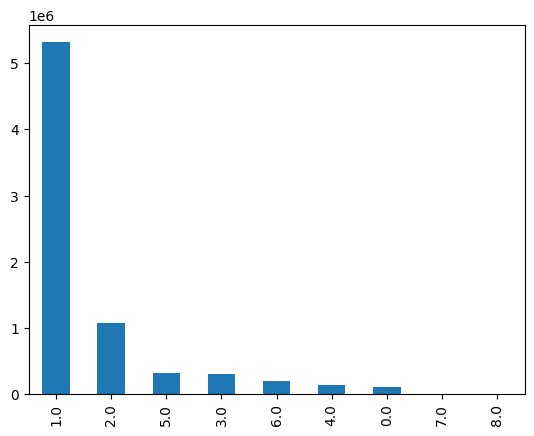

In [17]:
df['passenger_count'].value_counts().plot.bar()

In [11]:
df['RatecodeID'].value_counts()

1.0     7234032
2.0      155505
5.0       33622
3.0       10289
4.0         506
99.0        104
6.0          14
Name: RatecodeID, dtype: int64

In [1]:
df.RatecodeID>6

NameError: name 'df' is not defined

(array([1172273., 1315446.,       0., 1227500.,       0., 1055269.,
         980252.,       0.,  834341.,  877102.]),
 array([0. , 0.6, 1.2, 1.8, 2.4, 3. , 3.6, 4.2, 4.8, 5.4, 6. ]),
 <BarContainer object of 10 artists>)

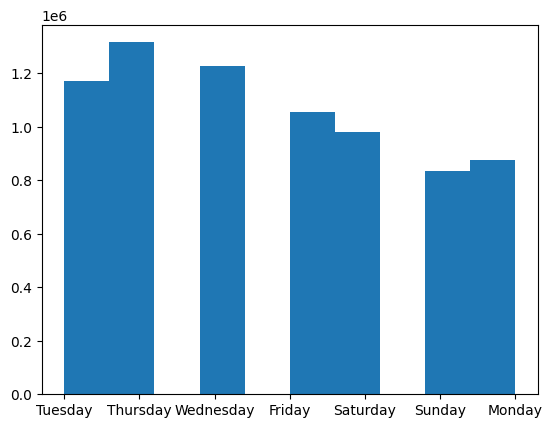

In [9]:
plt.hist(df.PUday)

In [9]:
df['PUday'].value_counts()

Thursday     1315446
Wednesday    1227500
Tuesday      1172273
Friday       1055269
Saturday      980252
Monday        877102
Sunday        834341
Name: PUday, dtype: int64

In [68]:
df1.loc[(df1.payment_type == 3),['payment_type', 'fare_amount']]

,payment_type,fare_amount
176,3,4.0
214,3,8.0
371,3,5.0
389,3,7.0
475,3,42.5
...,...,...
7666490,3,5.0
7666891,3,4.5
7666995,3,2.5
7667324,3,10.5


In [61]:
any((df.duration<0))

True

#references


#https://pandas.pydata.org/docs/reference/api/pandas.Series.dt.year.html
#https://medium.com/analytics-vidhya/exploratory-data-analysis-nyc-taxi-price-prediction-using-python-44fce176a8fe